In [1]:
%matplotlib inline

# Examples of using Python 3

## Plotting time graphs

### Importing the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import phjGenerateExampleData

# from matplotlib.dates import date2num
# import datetime as dt

In [4]:
# In order to reload a module (e.g. phjGenerateExamleData module following changes)
# do the following:
import importlib
importlib.reload(phjGenerateExampleData)

<module 'phjGenerateExampleData' from '/Users/philjones/Dropbox/phjPythonModules/phjGenerateExampleData.py'>

In [5]:
phjTempDF = phjGenerateExampleData.phjPandasDF9()
phjTempDF.dtypes

date             datetime64[ns]
outcome                   int64
random_normal           float64
dtype: object

In [6]:
# Based on tempDF.dtypes command above, it seems that the dtype for 'date' variable
# is already datetime64[ns]. But anyway, run the following:
phjTempDF['date'] = pd.to_datetime(phjTempDF['date'])

In [7]:
print("Head")
print(phjTempDF.head())
print("\nTail")
print(phjTempDF.tail())
print("\ndtypes")
print(phjTempDF.dtypes)

Head
        date  outcome  random_normal
0 2013-01-01        1       2.837028
1 2013-01-02        1       4.991143
2 2013-01-03        0       3.536247
3 2013-01-04        1       5.174693
4 2013-01-05        0       4.700815

Tail
           date  outcome  random_normal
1090 2015-12-27        0       5.339669
1091 2015-12-28        1       5.685234
1092 2015-12-29        1       4.212866
1093 2015-12-30        1       5.005712
1094 2015-12-31        1       6.297138

dtypes
date             datetime64[ns]
outcome                   int64
random_normal           float64
dtype: object


In [8]:
# Thought it might be necessary to convert datetimes to Python native format before use but
# actually seems as though Matplotlib can handle Pandas format. Has this always been the case
# or is it a recent feature?
# phjTempDF['dt'] = phjTempDF['date'].apply(lambda x: x.to_pydatetime())
# print(phjTempDF['dt'].head())

### A quick plot – the simplest of all graphs

#### Method 1 – Directly from Pandas dataframe

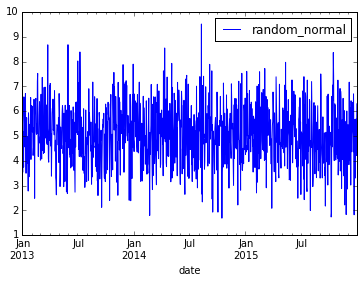

In [18]:
phjTempDF.plot('date','random_normal')

#### Method 2 – Using Pyplot

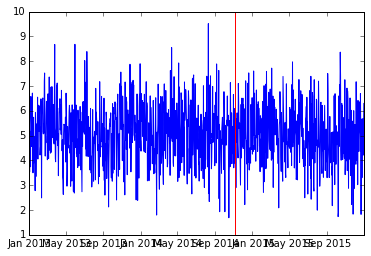

In [10]:
plt.figure(1)    # First figure. Optional. Will be created automatically if don't specify axes.
plt.subplot(111) # First (and in this case, only) subplot in the first figure. Optional. Will be created automatically if don't specify axes.
plt.plot_date(phjTempDF['date'], phjTempDF['random_normal'], '-')
plt.axvline(pd.Timestamp("2014-11-05 00:00:00"),color='r')

plt.show()

# I used to use the following structure for plotting graphs but I think I now prefer the above.
# fig = plt.figure()    # Returns a Figure where we can add one or more Axes instances
# ax = fig.add_subplot(1,1,1)
# ax.plot_date(tempDF['date'], tempDF['random_normal'], '-')
# plt.show()    # Seems this may not be strictly necessary when using Jupyter Notebook.

In [17]:
# N.B.
# ===
# Using plt.plot_date() to plot data from a sliced dataframe results in a KeyError: 0
# error message. This is discussed and explained at:
# http://stackoverflow.com/questions/12406162/keyerror-when-plotting-a-sliced-pandas-dataframe-with-datetimes
# The solution is to reset the index of the date variable.
# Or, alternatively, move both variables to a temporary dataframe and then reset the
# index on the temp dataframe before plotting.

##### Adding some bling 1 – titles and labels

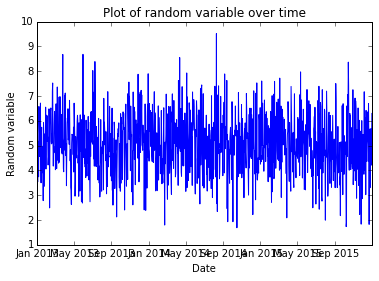

In [11]:
plt.figure(1)    # First figure. Optional. Will be created automatically if don't specify axes.
plt.subplot(111) # First (and in this case, only) subplot in the first figure. Optional. Will be created automatically if don't specify axes.
plt.plot_date(phjTempDF['date'], phjTempDF['random_normal'], '-')

# Add title and axis labels
plt.title("Plot of random variable over time")
plt.xlabel("Date")
plt.ylabel("Random variable")

plt.show()

##### Adding some bling 2 – formatting axes

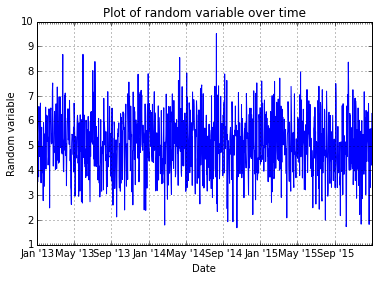

In [12]:
from matplotlib.dates import MonthLocator, DateFormatter, WeekdayLocator
from matplotlib.dates import MONDAY

plt.figure(1)    # First figure. Optional. Will be created automatically if don't specify axes.
ax = plt.subplot(111) # Will need access to axes to format ticks. Therefore, return axes instance.
plt.plot_date(phjTempDF['date'], phjTempDF['random_normal'], '-')

# Add title and axis labels
plt.title("Plot of random variable over time")
plt.xlabel("Date")
plt.ylabel("Random variable")

# Set up some formatters
phjMonths = MonthLocator(range(1,13), bymonthday=1, interval=6)
phjMonthsFmt = DateFormatter("%b '%y")
phjMondays = WeekdayLocator(MONDAY)

# Format axes
ax.xaxis.set_major_formatter(phjMonthsFmt)
ax.xaxis.set_minor_locator(phjMondays)
ax.autoscale_view()

ax.grid(True)
# ax.xaxis.grid(False, 'major')
# ax.xaxis.grid(True, 'minor')

plt.show()

## Aggregate variable over weeks

### Create 'weeks since start' variable

In [13]:
# Create variables containing year, month and week variables:
phjTempDF['year']  = phjTempDF['date'].dt.year
phjTempDF['month'] = phjTempDF['date'].dt.month
phjTempDF['week']  = phjTempDF['date'].dt.week

phjEarliestDate = phjTempDF['date'].dt.normalize().min()
phjLatestDate   = phjTempDF['date'].dt.normalize().max()
print("Earliest date:", phjEarliestDate)
print("Latest date: ",  phjLatestDate)

# Create a variable that shows number of weeks since start.
# The week variable created above gives the week number in the year and returns to 1 at the
# beginning of each year. It also produces weeks that contain less tha 7 days at the start
# and end of the year. Is there also a possibility that a year may contain 53 weeks?
# Instead, to produce a variable that represents the number of weeks since the start of the
# data collection, starting with the earliest date, then calculate the number of days since
# the start followed by division by 7, stored as an int.
phjTempDF['days_since_start'] = (phjTempDF['date'] - phjEarliestDate).dt.days
phjTempDF['weeks_since_start'] = phjTempDF['days_since_start'].divide(7).astype(int)
print("\nHead")
print(phjTempDF.head(10))
print("\nTail")
print(phjTempDF.tail(10))

Earliest date: 2013-01-01 00:00:00
Latest date:  2015-12-31 00:00:00

Head
        date  outcome  random_normal  year  month  week  days_since_start  \
0 2013-01-01        1       2.837028  2013      1     1                 0   
1 2013-01-02        1       4.991143  2013      1     1                 1   
2 2013-01-03        0       3.536247  2013      1     1                 2   
3 2013-01-04        1       5.174693  2013      1     1                 3   
4 2013-01-05        0       4.700815  2013      1     1                 4   
5 2013-01-06        0       3.744225  2013      1     1                 5   
6 2013-01-07        0       6.577247  2013      1     2                 6   
7 2013-01-08        1       5.860147  2013      1     2                 7   
8 2013-01-09        1       5.462953  2013      1     2                 8   
9 2013-01-10        1       4.561622  2013      1     2                 9   

   weeks_since_start  
0                  0  
1                  0  
2       

### Use groupby to aggregate variables over weeks

In [14]:
# Create GroupBy object
phjTempDFWeekGroupbyObj = phjTempDF.groupby('weeks_since_start')

# Aggregate to sum outcome column and find the first date of each week
phjTempDFWeekGroupbyDF = phjTempDFWeekGroupbyObj.agg({'outcome': sum, 'date': min})

# Reset the index (at the moment, weeks_since_start is the index)
phjTempDFWeekGroupbyDF = phjTempDFWeekGroupbyDF.reset_index()

print("\nHead")
print(phjTempDFWeekGroupbyDF.head(3))
print("\nTail")
print(phjTempDFWeekGroupbyDF.tail(3))


Head
   weeks_since_start       date  outcome
0                  0 2013-01-01        3
1                  1 2013-01-08        5
2                  2 2013-01-15        1

Tail
     weeks_since_start       date  outcome
154                154 2015-12-15        2
155                155 2015-12-22        1
156                156 2015-12-29        3


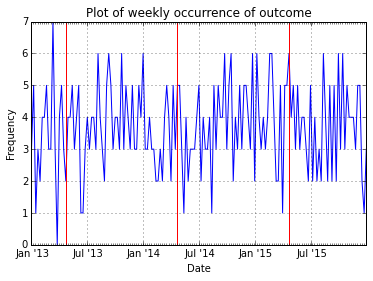

In [15]:
import datetime as dt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter, WeekdayLocator
from matplotlib.dates import MONDAY

plt.figure(1)    # First figure. Optional. Will be created automatically if don't specify axes.
ax = plt.subplot(111) # Will need access to axes to format ticks. Therefore, return axes instance.
plt.plot_date(phjTempDFWeekGroupbyDF['date'], phjTempDFWeekGroupbyDF['outcome'], '-')

# Add title and axis labels
plt.title("Plot of weekly occurrence of outcome")
plt.xlabel("Date")
plt.ylabel("Frequency")

# Set up some formatters
phjMonths = MonthLocator(range(1,13), bymonthday=1, interval=6)
phjMonthsFmt = DateFormatter("%b '%y")
phjMondays = WeekdayLocator(MONDAY)

# Format axes
ax.xaxis.set_major_locator(phjMonths)
ax.xaxis.set_major_formatter(phjMonthsFmt)
ax.xaxis.set_minor_locator(phjMondays)
ax.autoscale_view()

# Add a vertical line on same date each year 
phjUniqueYears = phjTempDFWeekGroupbyDF['date'].dt.year.unique()    # Return list of years present in dataframe
phjEarliestWeekDate = phjTempDFWeekGroupbyDF['date'].dt.normalize().min()
phjLatestWeekDate   = phjTempDFWeekGroupbyDF['date'].dt.normalize().max()

for phjYear in phjUniqueYears:
    phjAnniversary = dt.datetime(phjYear,4,22)
    if (phjAnniversary >= phjEarliestWeekDate) and (phjAnniversary <= phjLatestWeekDate):
        plt.axvline(phjAnniversary,color='r')

        
ax.grid(True)

plt.show()

---

## An example from online

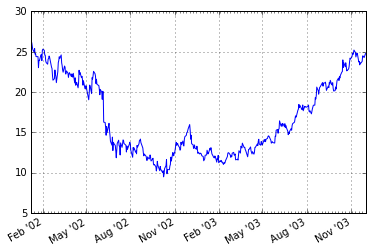

In [16]:
from matplotlib.dates import MONDAY
from matplotlib.finance import quotes_historical_yahoo_ochl
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

date1 = dt.date(2002, 1, 5)
date2 = dt.date(2003, 12, 1)

# every monday
mondays = WeekdayLocator(MONDAY)

# every 3rd month
months = MonthLocator(range(1, 13), bymonthday=1, interval=3)
monthsFmt = DateFormatter("%b '%y")


quotes = quotes_historical_yahoo_ochl('INTC', date1, date2)
if len(quotes) == 0:
    print('Found no quotes')
    raise SystemExit

dates = [q[0] for q in quotes]
opens = [q[1] for q in quotes]

fig, ax = plt.subplots()
ax.plot_date(dates, opens, '-')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(mondays)
ax.autoscale_view()
#ax.xaxis.grid(False, 'major')
#ax.xaxis.grid(True, 'minor')
ax.grid(True)

fig.autofmt_xdate()

plt.show()